In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager

rc('font', family="NanumGothic")

In [3]:
df_raw=pd.read_csv("../data/BigData/유방암.csv", engine="python", encoding="CP949")

df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_all_x = df_raw.drop('diagnosis', axis=1)
df_all_y = df_raw['diagnosis']
df_all_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

**데이터 확인 및 Scaling**

In [5]:
df_all_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


In [6]:
x_cols = df_all_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_all_x)
print('Scaled Data:\n{}'.format(nd_scaled[:5].round(3)))
print('Shape : \n{}'.format(nd_scaled.shape))

Scaled Data:
[[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-0

In [7]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397


In [8]:
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


**주성분 분석**

In [9]:
pca= PCA(n_components=30)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))

print("Shape : \n{}".format(nd_pca.shape))

PCA Data:
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626e-

**주성분 분석 및 결과 : 주성분 점수**

In [10]:
columns=["Prin"+str(i) for i in range(1, 31)]

In [11]:
df_pca=pd.DataFrame(nd_pca,columns=columns)
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


**주성분 분석 및 결과 : 고유값(EigenValue)확인 및 주성분 개수 결정**

In [12]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,31)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


**주성분 분석 및 결과 : Scree plot 확인 및 주성분 개수 결정**

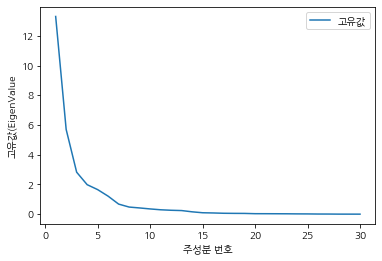

In [13]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValues'],label="고유값")
plt.ylabel('고유값(EigenValue')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

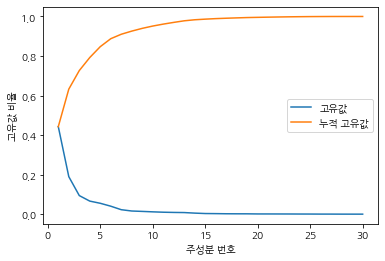

In [14]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'],label="고유값")
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label="누적 고유값")
plt.ylabel('고유값 비율')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

**주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석**

In [15]:
x_cols = pd.DataFrame({'Feature':df_all_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                                                columns=columns)],axis=1)
print(df_eigenvector[['Feature','Prin1']].round(3).sort_values(by='Prin1').head(3))
print(df_eigenvector[['Feature','Prin2']].round(3).sort_values(by='Prin2').head(3))
print(df_eigenvector[['Feature','Prin3']].round(3).sort_values(by='Prin3').head(3))
print(df_eigenvector[['Feature','Prin4']].round(3).sort_values(by='Prin4').head(3))
print(df_eigenvector[['Feature','Prin5']].round(3).sort_values(by='Prin5').head(3))

                 Feature  Prin1
7    mean concave points -0.261
6         mean concavity -0.258
27  worst concave points -0.251
                    Feature  Prin2
9    mean fractal dimension -0.367
19  fractal dimension error -0.280
29  worst fractal dimension -0.275
             Feature  Prin3
11     texture error -0.375
14  smoothness error -0.309
18    symmetry error -0.289
            Feature  Prin4
4   mean smoothness -0.159
13       area error -0.108
10     radius error -0.098
                    Feature  Prin5
16          concavity error -0.354
15        compactness error -0.280
19  fractal dimension error -0.263


* **고유값 확인 및 주성분 해석**
    - 1주성분은 mean concave points, mean concavity, worst concave poinst와의 음의 연관성
    - 2주성분은 mean fractal dimension, fractal dimension error, wrost fractal dimension 와의 음의 연관성 확인
    - 3주성분은 texture error, smoothness error, symmetry error와의 음의 연관성
    - 4주성분부터는 2,3주성분에서 가장 상관이 높았던 요소와 같은 값을 갖기 때문에 제외한다.

In [16]:
# 상관계수
temp=df_pca.corr().round(3)
su=0
for p in temp.columns:
    if temp[p].values.sum()>=1:
        su+=temp[p].values.sum()
print(su)

30.0


DataFrame을 전체로 확인하기 어려워 각 주성분의 상관계수값에서 0이 아닌 값의 개수를 세어본 결과 30이 도출되었고 이는 주성분 개수 30개와 일치하므로 자기자신에 대한 상관계수 1이 더해진것으로 볼 수 있다. 따라서 **주성분은 서로 독립적이다.**


**주성분 상관/회귀분석 :회귀분석**
다중 선형 회귀분석

In [17]:
df_all_x_const = sm.add_constant(df_all_x)
reg_model = sm.OLS(df_all_y, df_all_x_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 31 Oct 2019   Prob (F-statistic):          6.05e-153
Time:                        20:23:14   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


설명력은 0.762이고 각 회귀계수들의 유의성은 상이함

In [18]:
# 다중 선형 주성분 회귀분석 : 주성분 점수(score)데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var=['Prin1','Prin2','Prin3']

#선택된 주성분 점수 데이터에 절편(constant) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_all_y, df_pca_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     399.5
Date:                Thu, 31 Oct 2019   Prob (F-statistic):          3.48e-139
Time:                        20:23:14   Log-Likelihood:                -70.033
No. Observations:                 569   AIC:                             148.1
Df Residuals:                     565   BIC:                             165.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.012     32.362      0.0

설명력은 0.648로 전체 설명변수를 이용한 모델보다 설명력이 감소하였지만 모든 회귀계수들이 유의해졌습니다.

### <span style="color:red">추가)</span> 컬럼의 수가 너무 많기 때문에 목표변수 diagnosis와 상관이 높은 상위 5개의 변수만 사용해서 주성분분석 시도

In [19]:
df_raw.columns

Index(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [20]:
abs(df_raw.corr()['diagnosis'].round(3)).sort_values().tail(6).index

Index(['mean perimeter', 'worst radius', 'mean concave points',
       'worst perimeter', 'worst concave points', 'diagnosis'],
      dtype='object')

**선형관계 확인 : 산점도 및 상관계수**

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


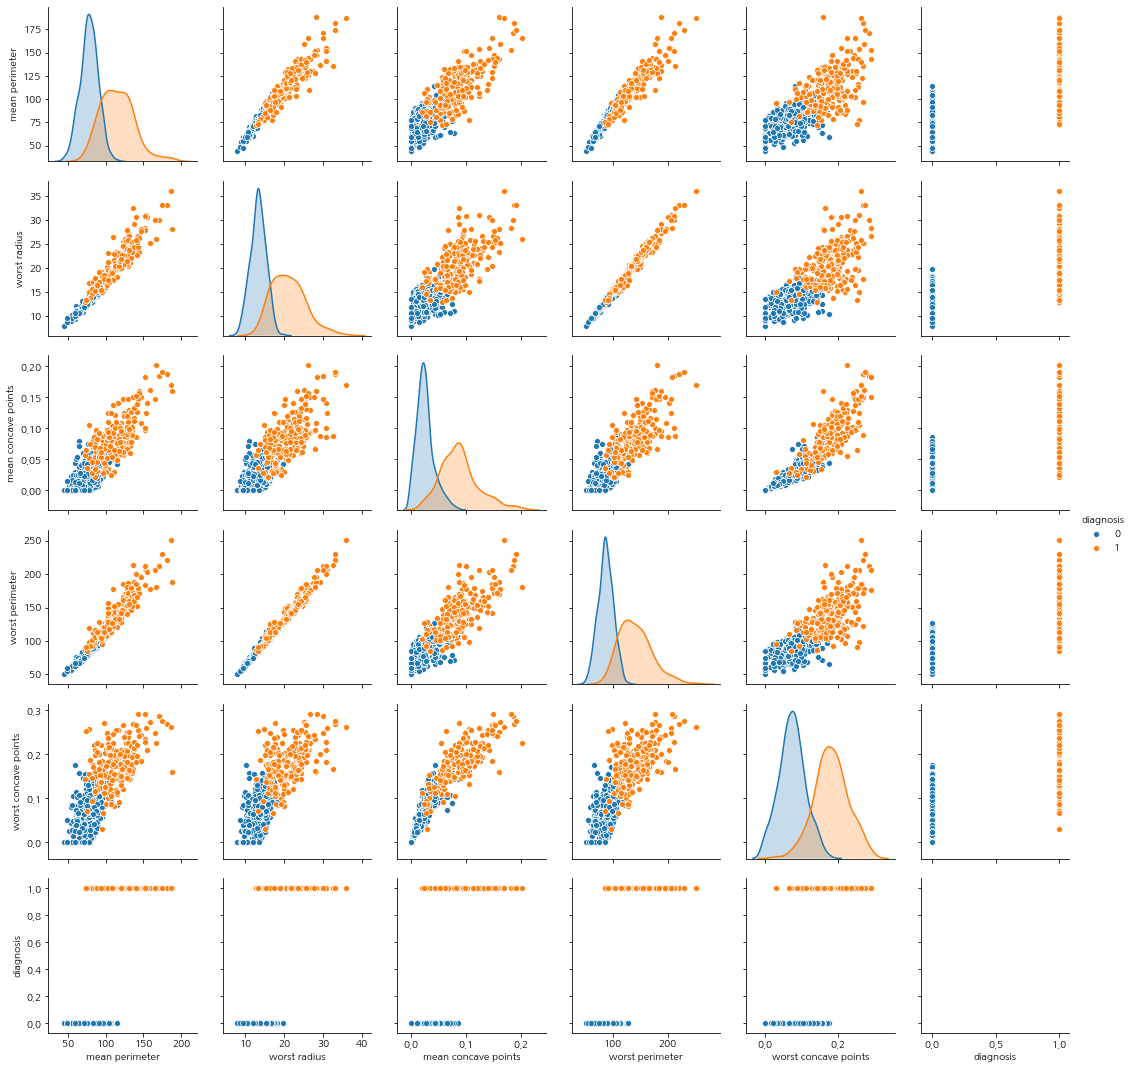

In [21]:
df_sub=df_raw[['mean perimeter', 'worst radius', 'mean concave points',
       'worst perimeter', 'worst concave points', 'diagnosis']]
sns.pairplot(df_sub, hue="diagnosis")

In [22]:
df_sub.corr().round(3)

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points,diagnosis
mean perimeter,1.000,0.969,0.851,0.970,0.771,0.743
worst radius,0.969,1.000,0.830,0.994,0.787,0.776
mean concave points,0.851,0.830,1.000,0.856,0.910,0.777
worst perimeter,0.970,0.994,0.856,1.000,0.816,0.783
worst concave points,0.771,0.787,0.910,0.816,1.000,0.794
diagnosis,0.743,0.776,0.777,0.783,0.794,1.000


In [23]:
df_raw_x = df_sub.drop('diagnosis', axis=1)
df_raw_y = df_sub['diagnosis']
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [24]:
df_raw_x.corr().round(3)

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
mean perimeter,1.000,0.969,0.851,0.970,0.771
worst radius,0.969,1.000,0.830,0.994,0.787
mean concave points,0.851,0.830,1.000,0.856,0.910
worst perimeter,0.970,0.994,0.856,1.000,0.816
worst concave points,0.771,0.787,0.910,0.816,1.000


* mean perimeter는 worst perimeter(0.970), worst radius(0.969)과 상관관계가 높음
* worst radius는 worst perimeter(0.994), mean perimeter(0.969)와 상관관계가 높음
* mean concave points는 worst concave points(0.910), worst perimeter(0.856)와 상관관계가 높음

**데이터 확인 및 Scaling**

In [25]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
count,569.000,569.000,569.000,569.000,569.000
mean,91.969,16.269,0.049,107.261,0.115
std,24.299,4.833,0.039,33.603,0.066
min,43.790,7.930,0.000,50.410,0.000
25%,75.170,13.010,0.020,84.110,0.065
50%,86.240,14.970,0.034,97.660,0.100
75%,104.100,18.790,0.074,125.400,0.161
max,188.500,36.040,0.201,251.200,0.291


In [26]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x) # Scaler 변환 후 ndarray 형식으로 변환됨.
print('Scaled Data:\n{}'.format(nd_scaled[:5].round(3))) # 앞의 5개 데이터만 확인
print('Shape : \n{}'.format(nd_scaled.shape))

Scaled Data:
[[ 1.27   1.887  2.532  2.304  2.296]
 [ 1.686  1.806  0.548  1.535  1.087]
 [ 1.567  1.512  2.037  1.347  1.955]
 [-0.593 -0.281  1.452 -0.25   2.176]
 [ 1.777  1.299  1.428  1.339  0.729]]
Shape : 
(569, 5)


In [27]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
0,1.270,1.887,2.532,2.304,2.296
1,1.686,1.806,0.548,1.535,1.087
2,1.567,1.512,2.037,1.347,1.955
3,-0.593,-0.281,1.452,-0.250,2.176
4,1.777,1.299,1.428,1.339,0.729


In [28]:
# Scale 변환 데이터의 요약 통계량
df_scaled.describe().round(3)

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
count,569.000,569.000,569.000,569.000,569.000
mean,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.985,-1.727,-1.262,-1.693,-1.745
25%,-0.692,-0.675,-0.738,-0.690,-0.756
50%,-0.236,-0.269,-0.398,-0.286,-0.223
75%,0.500,0.522,0.647,0.540,0.713
max,3.976,4.094,3.928,4.287,2.686


**주성분 분석**

In [29]:
pca= PCA(n_components=5) # 사용하는 변수가 5개 이므로 n_components=5로 할당한다.
nd_pca=pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data:\n{}".format(nd_pca[:5]))

# 생성된 주성분 점수 Row, Column개수 확인
print("Shape : \n{}".format(nd_pca.shape))

PCA Data:
[[ 4.58730638  0.77810702 -0.02542311  0.67407124  0.2458714 ]
 [ 2.99812833 -0.80037631 -0.49897826 -0.20378311 -0.15086659]
 [ 3.74747859  0.65093852  0.1521806  -0.08442177 -0.17351065]
 [ 1.04954729  2.4787508  -0.23433981  0.1382844  -0.12114534]
 [ 2.95366358 -0.4198413   0.51505765 -0.20025958  0.02872019]]
Shape : 
(569, 5)


**주성분 분석 및 결과 : 주성분 점수**

In [30]:
columns=["Prin"+str(i) for i in range(1,6) ]

In [31]:
df_pca=pd.DataFrame(nd_pca,columns=columns)
df_scaled_pca = df_scaled.join(df_pca) # 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca.head()

,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points,Prin1,Prin2,Prin3,Prin4,Prin5
0,1.269934,1.886690,2.532475,2.303601,2.296076,4.587306,0.778107,-0.025423,0.674071,0.245871
1,1.685955,1.805927,0.548144,1.535126,1.087084,2.998128,-0.800376,-0.498978,-0.203783,-0.150867
2,1.566503,1.511870,2.037231,1.347475,1.955000,3.747479,0.650939,0.152181,-0.084422,-0.173511
3,-0.592687,-0.281464,1.451707,-0.249939,2.175786,1.049547,2.478751,-0.234340,0.138284,-0.121145
4,1.776573,1.298575,1.428493,1.338539,0.729259,2.953664,-0.419841,0.515058,-0.200260,0.028720


**주성분 분석 및 결과 : 고유값(EigenValue)확인 및 주성분 개수 결정**

In [32]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,6)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3).head(10)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,4.514,0.901,0.901
1,2,0.368,0.074,0.975
2,3,0.092,0.018,0.993
3,4,0.029,0.006,0.999
4,5,0.005,0.001,1.000


In [33]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5
Prin1,1.0,-0.0,-0.0,-0.0,-0.0
Prin2,-0.0,1.0,0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0
Prin5,-0.0,0.0,0.0,0.0,1.0


주성분끼리의 상관계수가 0이기 때문에 서로 독립적이다.

**주성분 분석 및 결과 : Scree plot 확인 및 주성분 개수 결정**

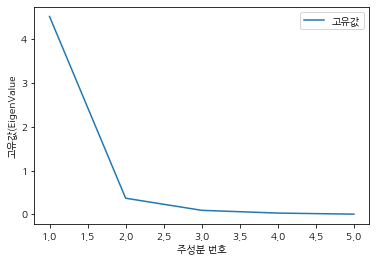

In [34]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValues'],label="고유값")
plt.ylabel('고유값(EigenValue')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

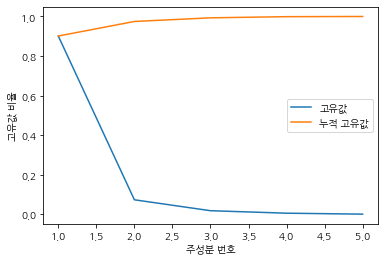

In [35]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'],label="고유값")
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label="누적 고유값")
plt.ylabel('고유값 비율')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

**주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석**

In [36]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                                                columns=columns)],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5
0,mean perimeter,-0.454,0.365,-0.249,0.774,-0.000
1,worst radius,-0.456,0.381,0.219,-0.376,0.676
2,mean concave points,-0.441,-0.450,-0.724,-0.279,0.036
3,worst perimeter,-0.461,0.298,0.193,-0.348,-0.735
4,worst concave points,-0.424,-0.656,0.573,0.245,0.035


* 고유값 확인 및 주성분 해석
    - 1주성분은 mean concavity와 mean compactness, worst concavity 간의 음의 연관성
    - 2주성분은 mean fractal dimension과 fractal dimension error	간의 음의 연관성이 확인되었다.
* 분석가에 따라 다른 그룹 생성 및 해석 가능

**주성분 상관/회귀분석 :회귀분석**

In [37]:
# 다중 선형 주성분 회귀분석 : 주성분 점수(score)데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var=['Prin'+str(i) for i in range(1,6)]

#선택된 주성분 점수 데이터에 절편(constant) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     260.7
Date:                Thu, 31 Oct 2019   Prob (F-statistic):          6.06e-144
Time:                        20:23:26   Log-Likelihood:                -52.861
No. Observations:                 569   AIC:                             117.7
Df Residuals:                     563   BIC:                             143.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.294      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


    설명력은 0.696으로 전체 설명변수를 이용한 모델보다 설명력이 감소하였지만 위의 모든 설명변수를 사용해 만든 고유값(Eigenvalue)들이 1 이상으로 만든 회귀분석보다 설명력은 향상되었고 모든 회귀계수들이 유의합니다.
    설명력 향상에 대한 이유를 생각해보자면,
    우선 주성분을 5개 사용하므로써 더 다양한 각도에서 데이터를 바라보고 있는 것이기 때문에 모델의 정확도가 향상된것으로 생각됩니다.

# 결론
* 전체 설명변수를 이용한 모델보다 직접 변수를 구성하여 만든 5개 주성분을 이용한 회귀모델의 설명력이 전체 설명변수를 이용하여 도출한 EigenValue와 CumEigenValueRatio를 고려하여 만든 모델보다 **약 1.02% 향상**되었고, 전체 설명변수를 이용한 모델보다 **0.9% 저하 **되었다.
    * 기여율이 약한 변수 25개를 제외하여 설명력이 저하됨
* 직접 변수를 구성하여 만든 주성분분석의 경우 스스로 신뢰할 수 없기때문에 전체 설명변수를 이용한 모델에서 EigenValue(고유값)이 높았던 **3개의 주성분**으로 구성된 모델을 최종 모델로 선정하겠습니다.

**주성분 끼리의 산점도**

In [41]:
df_pca_best3=df_pca[x_var]
df_pca_best3["diagnosis"]=df_all_y
df_pca_best3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
Prin1        569 non-null float64
Prin2        569 non-null float64
Prin3        569 non-null float64
Prin4        569 non-null float64
Prin5        569 non-null float64
diagnosis    569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,Prin1,Prin2,Prin3,Prin4,Prin5,diagnosis
Prin1,1.000,-0.000,-0.000,-0.000,-0.000,0.815
Prin2,-0.000,1.000,0.000,-0.000,0.000,0.116
Prin3,-0.000,0.000,1.000,-0.000,0.000,-0.097
Prin4,-0.000,-0.000,-0.000,1.000,0.000,0.073
Prin5,-0.000,0.000,0.000,0.000,1.000,-0.076
diagnosis,0.815,0.116,-0.097,0.073,-0.076,1.000


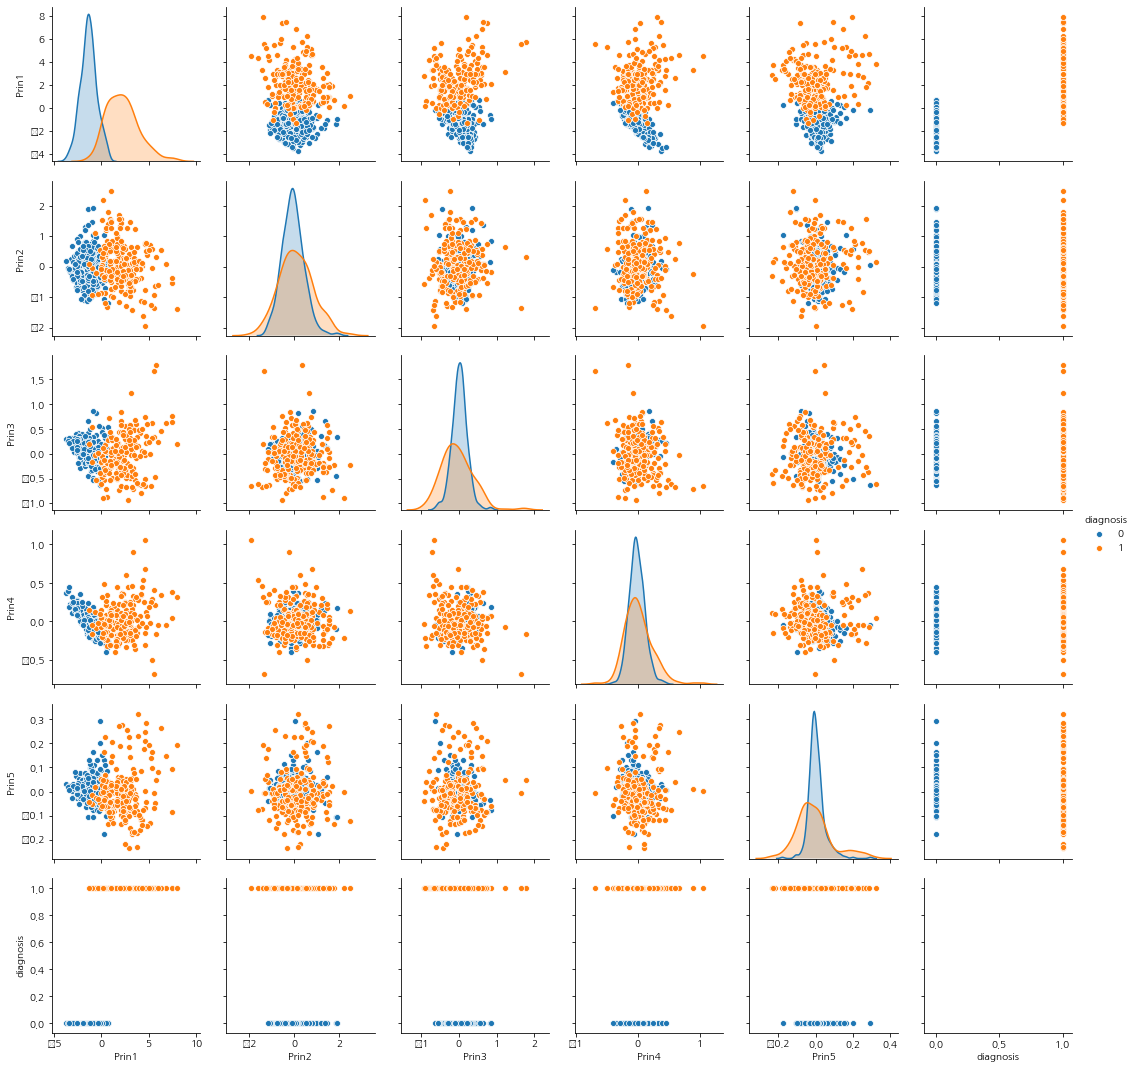

In [42]:
sns.pairplot(df_pca_best3, hue="diagnosis")
df_pca_best3.corr().round(3)

**1번 주성분**의 경우, 

|mean concave points|mean concavity|worst concave points|
|-----|---|-------|
|-0.261|-0.258|-0.251| 


평균 오목한점의 개수와 평균 오목함 정도, 최악 오목한점이 음의 영향을 미치고 있다.  

**2번 주성분**의 경우, 

|mean fractal dimension|fractal dimension error|worst fractal dimension|
|-----|---|-------|
|-0.367|-0.280|-0.275|

평균 프랙탈 차원(공간에 패턴을 얼마나 조밀하게 채우는지), 프랙탈 에러, 비대칭이 음의 영향을 미치고 있다.  


**3번 주성분**의 경우,  

|textrue error|smoothness error|symmetry error|
|-----|---|-------|
|-0.375|-0.309|-0.289|  


질감 에러, 매끄러움 에러, 비대칭이 음의 영향을 미치고 있다.  

모델에 사용된 3가지 주성분의 특성을 조합해서 마지막 결론을 내려보자면 다음과 같다.  

### 관측된 암세포에 오목한 점의 개수와 오목함이 작을수록, 조밀하고, 비대칭일 수록, 매끄럽지 않을 수록 악성으로 판정될 확률이 높다.